In [15]:
import torch
import torch.nn as nn
import torchvision.transforms as transforms
import torch.optim as optim
import torchvision.datasets as datasets
import imageio
import numpy as np
import matplotlib
from torchvision.utils import make_grid, save_image
from torch.utils.data import DataLoader
from matplotlib import pyplot as plt
from tqdm import tqdm

# Define learning parameters

In [16]:
# learning parameters
batch_size = 128
epochs = 100
sample_size = 64 # fixed sample size for generator
nz = 128 # latent vector size
k = 1 # number of steps to apply to the discriminator
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)

cuda


# Prepare training dataset

In [17]:
transform = transforms.Compose([
                                transforms.ToTensor(),
                                transforms.Normalize((0.5,),(0.5,)),
])
to_pil_image = transforms.ToPILImage()

# Make input, output folders
!mkdir -p input
!mkdir -p outputs

# Load train data
train_data = datasets.MNIST(
    root='input/data',
    train=True,
    download=True,
    transform=transform
)
train_loader = DataLoader(train_data, batch_size=batch_size, shuffle=True)

A subdirectory or file -p already exists.
Error occurred while processing: -p.
A subdirectory or file input already exists.
Error occurred while processing: input.
A subdirectory or file -p already exists.
Error occurred while processing: -p.
A subdirectory or file outputs already exists.
Error occurred while processing: outputs.


# Generator

In [18]:
class Generator(nn.Module):
    def __init__(self, nz):
        super(Generator, self).__init__()
        self.nz = nz
        self.main = nn.Sequential(
            nn.Linear(self.nz, 256),
            nn.LeakyReLU(0.2),
            nn.Linear(256, 512),
            nn.LeakyReLU(0.2),
            nn.Linear(512, 1024),
            nn.LeakyReLU(0.2),
            nn.Linear(1024, 784),
            nn.Tanh(),
        )
    def forward(self, x):
        return self.main(x).view(-1, 1, 28, 28)

# Discriminator

In [19]:
class Discriminator(nn.Module):
    def __init__(self):
        super(Discriminator, self).__init__()
        self.n_input = 784
        self.main = nn.Sequential(
            nn.Linear(self.n_input, 1024),
            nn.LeakyReLU(0.2),
            nn.Dropout(0.3),
            nn.Linear(1024, 512),
            nn.LeakyReLU(0.2),
            nn.Dropout(0.3),
            nn.Linear(512, 256),
            nn.LeakyReLU(0.2),
            nn.Dropout(0.3),
            nn.Linear(256, 1),
            nn.Sigmoid(),
        )
    def forward(self, x):
        x = x.view(-1, 784)
        return self.main(x)

In [20]:
generator = Generator(nz).to(device)
discriminator = Discriminator().to(device)
print('##### GENERATOR #####')
print(generator)
print('######################')
print('\n##### DISCRIMINATOR #####')
print(discriminator)
print('######################')

##### GENERATOR #####
Generator(
  (main): Sequential(
    (0): Linear(in_features=128, out_features=256, bias=True)
    (1): LeakyReLU(negative_slope=0.2)
    (2): Linear(in_features=256, out_features=512, bias=True)
    (3): LeakyReLU(negative_slope=0.2)
    (4): Linear(in_features=512, out_features=1024, bias=True)
    (5): LeakyReLU(negative_slope=0.2)
    (6): Linear(in_features=1024, out_features=784, bias=True)
    (7): Tanh()
  )
)
######################

##### DISCRIMINATOR #####
Discriminator(
  (main): Sequential(
    (0): Linear(in_features=784, out_features=1024, bias=True)
    (1): LeakyReLU(negative_slope=0.2)
    (2): Dropout(p=0.3, inplace=False)
    (3): Linear(in_features=1024, out_features=512, bias=True)
    (4): LeakyReLU(negative_slope=0.2)
    (5): Dropout(p=0.3, inplace=False)
    (6): Linear(in_features=512, out_features=256, bias=True)
    (7): LeakyReLU(negative_slope=0.2)
    (8): Dropout(p=0.3, inplace=False)
    (9): Linear(in_features=256, out_features=1

# Tools for training

In [21]:
# optimizers
optim_g = optim.Adam(generator.parameters(), lr=0.0002)
optim_d = optim.Adam(discriminator.parameters(), lr=0.0002)

In [22]:
# loss function
criterion = nn.BCELoss() # Binary Cross Entropy loss

In [23]:
losses_g = [] # to store generator loss after each epoch
losses_d = [] # to store discriminator loss after each epoch
images = [] # to store images generatd by the generator

In [24]:
# to create real labels (1s)
def label_real(size):
    data = torch.ones(size, 1)
    return data.to(device)
# to create fake labels (0s)
def label_fake(size):
    data = torch.zeros(size, 1)
    return data.to(device)


In [25]:
# function to create the noise vector
def create_noise(sample_size, nz):
    return torch.randn(sample_size, nz).to(device)

In [26]:
# to save the images generated by the generator
def save_generator_image(image, path):
    save_image(image, path)

In [27]:
# create the noise vector - fixed to track how GAN is trained.
noise = create_noise(sample_size, nz)

# Q. Write training loop

469it [00:14, 32.57it/s]                         


Epoch 1 of 100
Generator loss: 2.20534658, Discriminator loss: 0.94124931


469it [00:14, 32.72it/s]                         


Epoch 2 of 100
Generator loss: 1.18389404, Discriminator loss: 1.25430489


469it [00:14, 32.97it/s]                         


Epoch 3 of 100
Generator loss: 1.02320147, Discriminator loss: 1.25296652


469it [00:14, 32.97it/s]                         


Epoch 4 of 100
Generator loss: 1.90172386, Discriminator loss: 1.00504434


469it [00:14, 32.99it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


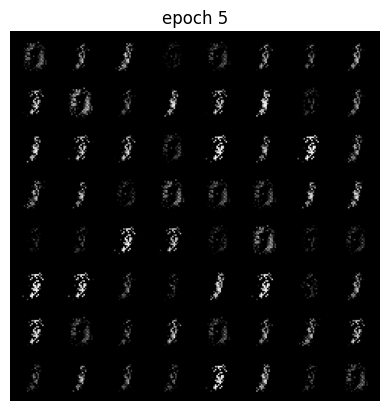

Epoch 5 of 100
Generator loss: 2.19520950, Discriminator loss: 0.86655957


469it [00:14, 32.97it/s]                         


Epoch 6 of 100
Generator loss: 1.60728180, Discriminator loss: 0.93707246


469it [00:14, 32.79it/s]                         


Epoch 7 of 100
Generator loss: 1.88727987, Discriminator loss: 0.83174002


469it [00:14, 32.64it/s]                         


Epoch 8 of 100
Generator loss: 2.14716816, Discriminator loss: 0.69460839


469it [00:14, 32.89it/s]                         


Epoch 9 of 100
Generator loss: 2.06019735, Discriminator loss: 0.73408633


469it [00:14, 33.10it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


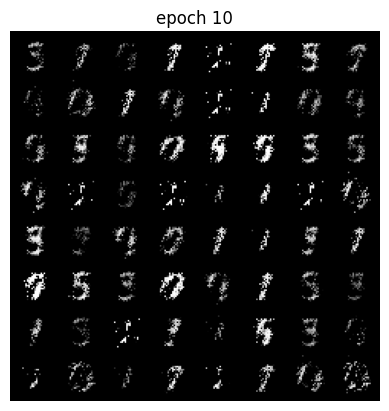

Epoch 10 of 100
Generator loss: 2.04409146, Discriminator loss: 0.78877288


469it [00:14, 33.00it/s]                         


Epoch 11 of 100
Generator loss: 2.05335689, Discriminator loss: 0.73585349


469it [00:14, 33.12it/s]                         


Epoch 12 of 100
Generator loss: 2.00922370, Discriminator loss: 0.73662239


469it [00:14, 33.01it/s]                         


Epoch 13 of 100
Generator loss: 2.21711826, Discriminator loss: 0.71308035


469it [00:14, 32.92it/s]                         


Epoch 14 of 100
Generator loss: 2.55148959, Discriminator loss: 0.64004976


469it [00:14, 33.06it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


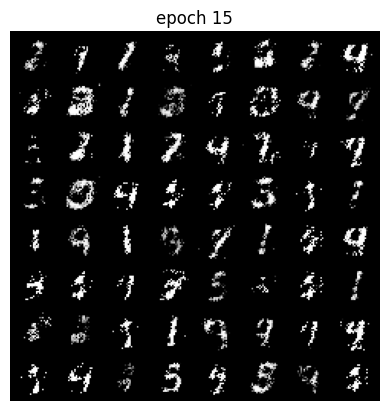

Epoch 15 of 100
Generator loss: 2.37895727, Discriminator loss: 0.69438404


469it [00:14, 33.08it/s]                         


Epoch 16 of 100
Generator loss: 2.09665322, Discriminator loss: 0.75697154


469it [00:14, 33.02it/s]                         


Epoch 17 of 100
Generator loss: 2.13989186, Discriminator loss: 0.75491214


469it [00:14, 32.47it/s]                         


Epoch 18 of 100
Generator loss: 2.00538492, Discriminator loss: 0.78401077


469it [00:14, 32.93it/s]                         


Epoch 19 of 100
Generator loss: 2.11151266, Discriminator loss: 0.74381685


469it [00:14, 33.02it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


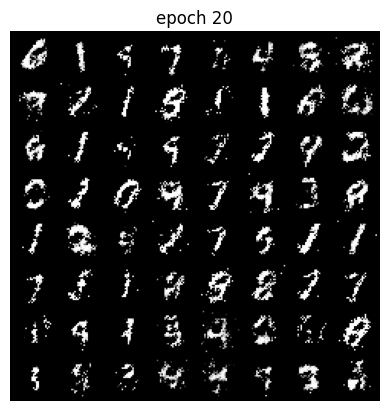

Epoch 20 of 100
Generator loss: 2.11125898, Discriminator loss: 0.73332644


469it [00:14, 33.09it/s]                         


Epoch 21 of 100
Generator loss: 2.00574255, Discriminator loss: 0.76011318


469it [00:14, 33.20it/s]                         


Epoch 22 of 100
Generator loss: 1.94521070, Discriminator loss: 0.78515184


469it [00:14, 33.18it/s]                         


Epoch 23 of 100
Generator loss: 1.92318058, Discriminator loss: 0.78965205


469it [00:14, 32.92it/s]                         


Epoch 24 of 100
Generator loss: 1.92347515, Discriminator loss: 0.79240912


469it [00:14, 33.37it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


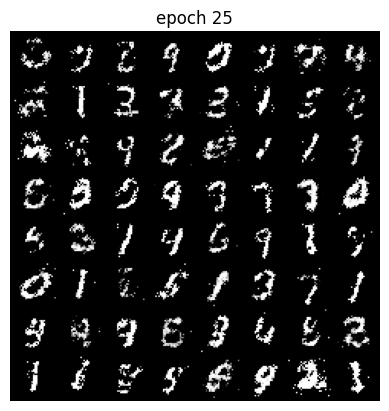

Epoch 25 of 100
Generator loss: 1.71886086, Discriminator loss: 0.87400419


469it [00:14, 33.35it/s]                         


Epoch 26 of 100
Generator loss: 1.68326390, Discriminator loss: 0.88469023


469it [00:14, 33.09it/s]                         


Epoch 27 of 100
Generator loss: 1.61732817, Discriminator loss: 0.89934939


469it [00:14, 33.19it/s]                         


Epoch 28 of 100
Generator loss: 1.61185539, Discriminator loss: 0.91416770


469it [00:14, 33.24it/s]                         


Epoch 29 of 100
Generator loss: 1.50901151, Discriminator loss: 0.93706673


469it [00:14, 33.14it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


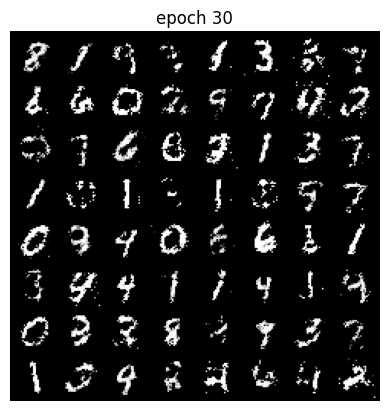

Epoch 30 of 100
Generator loss: 1.54650497, Discriminator loss: 0.93423438


469it [00:14, 33.04it/s]                         


Epoch 31 of 100
Generator loss: 1.43820870, Discriminator loss: 0.97870874


469it [00:14, 33.01it/s]                         


Epoch 32 of 100
Generator loss: 1.42009985, Discriminator loss: 0.97547346


469it [00:14, 32.99it/s]                         


Epoch 33 of 100
Generator loss: 1.44533575, Discriminator loss: 0.96363574


469it [00:14, 33.07it/s]                         


Epoch 34 of 100
Generator loss: 1.44571459, Discriminator loss: 0.97384959


469it [00:14, 33.12it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


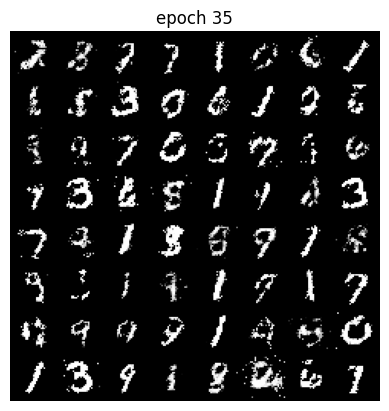

Epoch 35 of 100
Generator loss: 1.58566606, Discriminator loss: 0.91502619


469it [00:14, 33.23it/s]                         


Epoch 36 of 100
Generator loss: 1.55040097, Discriminator loss: 0.92263669


469it [00:14, 32.87it/s]                         


Epoch 37 of 100
Generator loss: 1.43141365, Discriminator loss: 0.98197877


469it [00:14, 33.15it/s]                         


Epoch 38 of 100
Generator loss: 1.40739071, Discriminator loss: 0.98315597


469it [00:14, 32.92it/s]                         


Epoch 39 of 100
Generator loss: 1.39791071, Discriminator loss: 0.99329329


469it [00:14, 32.55it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


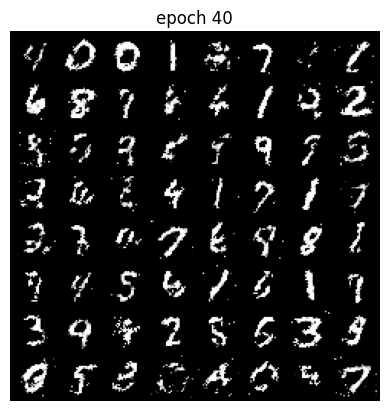

Epoch 40 of 100
Generator loss: 1.31622207, Discriminator loss: 1.02654719


469it [00:14, 32.78it/s]                         


Epoch 41 of 100
Generator loss: 1.38770759, Discriminator loss: 1.00206888


469it [00:14, 33.02it/s]                         


Epoch 42 of 100
Generator loss: 1.37299383, Discriminator loss: 1.00160778


469it [00:14, 33.09it/s]                         


Epoch 43 of 100
Generator loss: 1.32108188, Discriminator loss: 1.02340937


469it [00:14, 33.00it/s]                         


Epoch 44 of 100
Generator loss: 1.33030355, Discriminator loss: 1.02285266


469it [00:14, 32.82it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


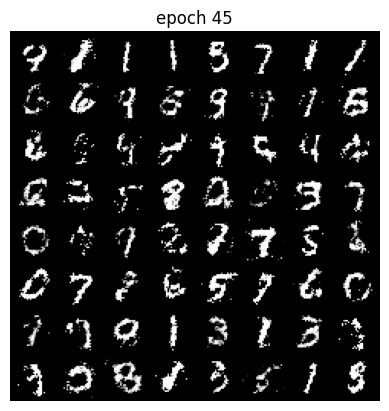

Epoch 45 of 100
Generator loss: 1.35887134, Discriminator loss: 1.00371873


469it [00:14, 33.19it/s]                         


Epoch 46 of 100
Generator loss: 1.38220239, Discriminator loss: 0.99542433


469it [00:14, 33.07it/s]                         


Epoch 47 of 100
Generator loss: 1.33416307, Discriminator loss: 1.01694202


469it [00:14, 32.97it/s]                         


Epoch 48 of 100
Generator loss: 1.25397825, Discriminator loss: 1.05631924


469it [00:14, 33.19it/s]                         


Epoch 49 of 100
Generator loss: 1.31895912, Discriminator loss: 1.02329445


469it [00:14, 33.27it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


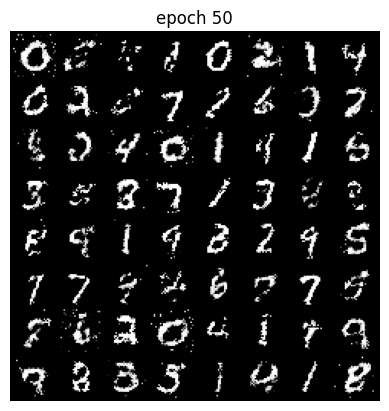

Epoch 50 of 100
Generator loss: 1.31297350, Discriminator loss: 1.02823186


469it [00:14, 33.10it/s]                         


Epoch 51 of 100
Generator loss: 1.29319608, Discriminator loss: 1.03088963


469it [00:14, 32.93it/s]                         


Epoch 52 of 100
Generator loss: 1.24336135, Discriminator loss: 1.06976736


469it [00:14, 33.14it/s]                         


Epoch 53 of 100
Generator loss: 1.20132184, Discriminator loss: 1.08583581


469it [00:14, 32.94it/s]                         


Epoch 54 of 100
Generator loss: 1.24651647, Discriminator loss: 1.06165349


469it [00:14, 32.88it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


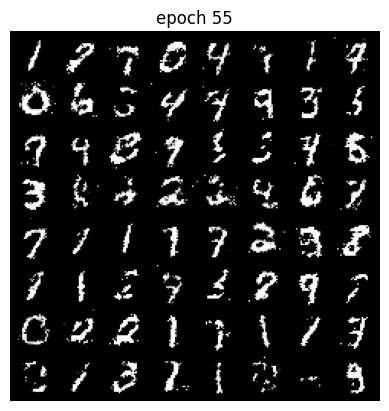

Epoch 55 of 100
Generator loss: 1.31565404, Discriminator loss: 1.02647614


469it [00:14, 33.10it/s]                         


Epoch 56 of 100
Generator loss: 1.30639493, Discriminator loss: 1.03701603


469it [00:14, 33.14it/s]                         


Epoch 57 of 100
Generator loss: 1.26381814, Discriminator loss: 1.04910350


469it [00:14, 32.94it/s]                         


Epoch 58 of 100
Generator loss: 1.27488220, Discriminator loss: 1.06029999


469it [00:14, 33.09it/s]                         


Epoch 59 of 100
Generator loss: 1.28529608, Discriminator loss: 1.04017198


469it [00:14, 33.21it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


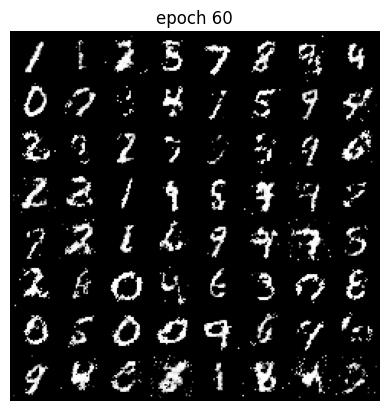

Epoch 60 of 100
Generator loss: 1.23186529, Discriminator loss: 1.06621683


469it [00:14, 33.07it/s]                         


Epoch 61 of 100
Generator loss: 1.24828637, Discriminator loss: 1.06629789


469it [00:14, 32.56it/s]                         


Epoch 62 of 100
Generator loss: 1.24822485, Discriminator loss: 1.06070399


469it [00:14, 32.90it/s]                         


Epoch 63 of 100
Generator loss: 1.28096032, Discriminator loss: 1.03316629


469it [00:14, 32.87it/s]                         


Epoch 64 of 100
Generator loss: 1.23670459, Discriminator loss: 1.07165301


469it [00:14, 33.02it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


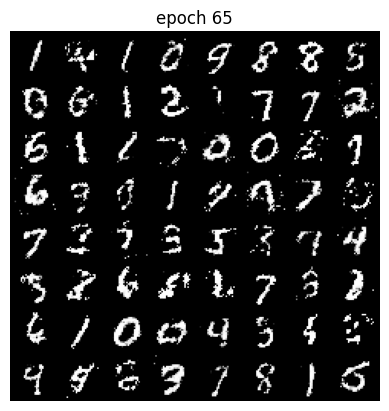

Epoch 65 of 100
Generator loss: 1.18317187, Discriminator loss: 1.09560645


469it [00:14, 33.07it/s]                         


Epoch 66 of 100
Generator loss: 1.30228209, Discriminator loss: 1.03554237


469it [00:14, 33.06it/s]                         


Epoch 67 of 100
Generator loss: 1.27686405, Discriminator loss: 1.04239964


469it [00:14, 32.95it/s]                         


Epoch 68 of 100
Generator loss: 1.20761120, Discriminator loss: 1.08020604


469it [00:14, 33.05it/s]                         


Epoch 69 of 100
Generator loss: 1.13836622, Discriminator loss: 1.12465727


469it [00:14, 33.10it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


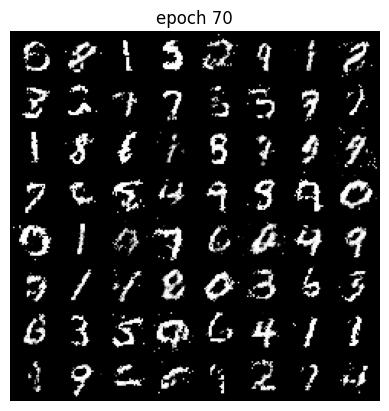

Epoch 70 of 100
Generator loss: 1.20511353, Discriminator loss: 1.08081663


469it [00:14, 33.09it/s]                         


Epoch 71 of 100
Generator loss: 1.20633662, Discriminator loss: 1.08314347


469it [00:14, 33.12it/s]                         


Epoch 72 of 100
Generator loss: 1.23829198, Discriminator loss: 1.06730771


469it [00:14, 32.36it/s]                         


Epoch 73 of 100
Generator loss: 1.23800838, Discriminator loss: 1.06298614


469it [00:14, 32.27it/s]                         


Epoch 74 of 100
Generator loss: 1.26137269, Discriminator loss: 1.05423272


469it [00:14, 33.45it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


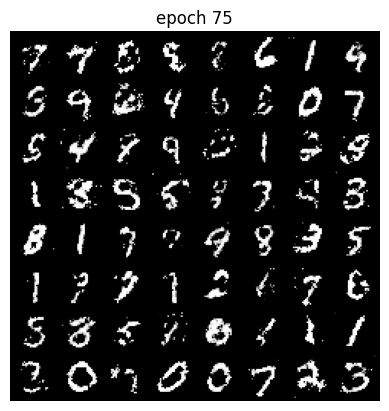

Epoch 75 of 100
Generator loss: 1.16684628, Discriminator loss: 1.10688925


469it [00:13, 33.84it/s]                         


Epoch 76 of 100
Generator loss: 1.16266179, Discriminator loss: 1.10455072


469it [00:13, 33.78it/s]                         


Epoch 77 of 100
Generator loss: 1.16564465, Discriminator loss: 1.09702945


469it [00:13, 33.90it/s]                         


Epoch 78 of 100
Generator loss: 1.18182623, Discriminator loss: 1.09257269


469it [00:13, 33.78it/s]                         


Epoch 79 of 100
Generator loss: 1.12607300, Discriminator loss: 1.12595463


469it [00:14, 32.13it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


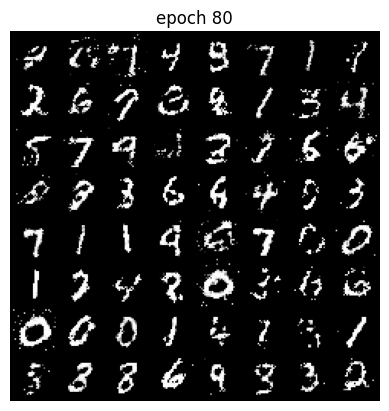

Epoch 80 of 100
Generator loss: 1.17587888, Discriminator loss: 1.09731984


469it [00:14, 32.53it/s]                         


Epoch 81 of 100
Generator loss: 1.18171084, Discriminator loss: 1.08957076


469it [00:14, 33.04it/s]                         


Epoch 82 of 100
Generator loss: 1.13801479, Discriminator loss: 1.12180769


469it [00:14, 32.54it/s]                         


Epoch 83 of 100
Generator loss: 1.10560787, Discriminator loss: 1.14094460


469it [00:14, 32.95it/s]                         


Epoch 84 of 100
Generator loss: 1.11669159, Discriminator loss: 1.12976146


469it [00:14, 32.83it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


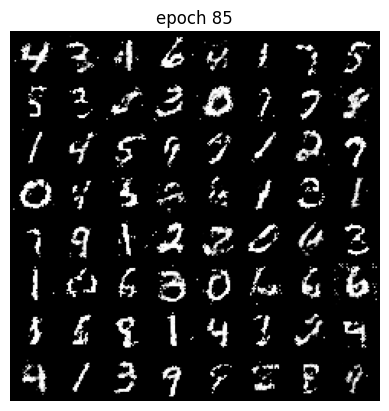

Epoch 85 of 100
Generator loss: 1.15286994, Discriminator loss: 1.11810195


469it [00:14, 33.07it/s]                         


Epoch 86 of 100
Generator loss: 1.18403256, Discriminator loss: 1.08282363


469it [00:14, 33.09it/s]                         


Epoch 87 of 100
Generator loss: 1.18075144, Discriminator loss: 1.09042895


469it [00:14, 33.15it/s]                         


Epoch 88 of 100
Generator loss: 1.17110395, Discriminator loss: 1.10599053


469it [00:14, 33.02it/s]                         


Epoch 89 of 100
Generator loss: 1.10772514, Discriminator loss: 1.13636529


469it [00:14, 33.10it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


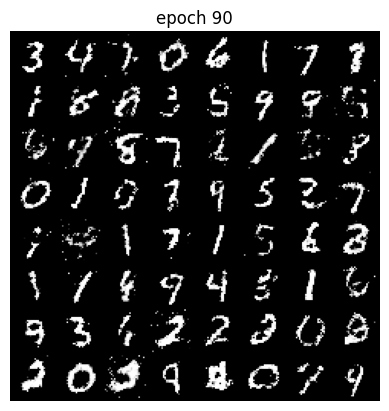

Epoch 90 of 100
Generator loss: 1.14102829, Discriminator loss: 1.12000465


469it [00:14, 33.06it/s]                         


Epoch 91 of 100
Generator loss: 1.11368418, Discriminator loss: 1.13188481


469it [00:14, 32.93it/s]                         


Epoch 92 of 100
Generator loss: 1.11835229, Discriminator loss: 1.12873816


469it [00:14, 33.18it/s]                         


Epoch 93 of 100
Generator loss: 1.16144478, Discriminator loss: 1.10736310


469it [00:14, 33.21it/s]                         


Epoch 94 of 100
Generator loss: 1.15610313, Discriminator loss: 1.10806954


469it [00:14, 33.13it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


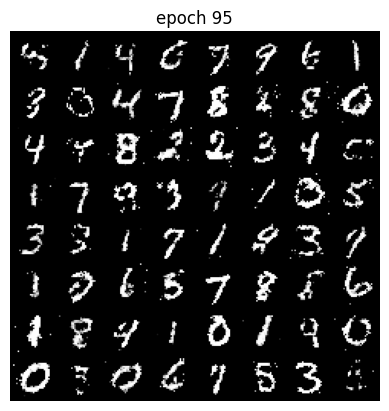

Epoch 95 of 100
Generator loss: 1.11233556, Discriminator loss: 1.13656056


469it [00:14, 33.29it/s]                         


Epoch 96 of 100
Generator loss: 1.13257182, Discriminator loss: 1.11441016


469it [00:14, 33.14it/s]                         


Epoch 97 of 100
Generator loss: 1.13256299, Discriminator loss: 1.12423313


469it [00:14, 33.09it/s]                         


Epoch 98 of 100
Generator loss: 1.08623505, Discriminator loss: 1.14371800


469it [00:14, 33.28it/s]                         


Epoch 99 of 100
Generator loss: 1.13000643, Discriminator loss: 1.12037706


469it [00:14, 33.11it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


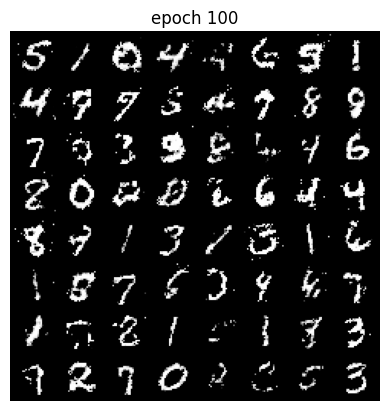

Epoch 100 of 100
Generator loss: 1.11722398, Discriminator loss: 1.13004589


In [28]:
torch.manual_seed(7777)

for epoch in range(epochs):
    loss_g = 0.0
    loss_d = 0.0
    for bi, (data, target) in tqdm(enumerate(train_loader), total=int(len(train_data)/train_loader.batch_size)):
        ############ YOUR CODE HERE ##########
        ## Discriminator stuff
        optim_d.zero_grad()

        # Real data       
        discriminator_real_predict = discriminator.forward(data.to(device))
        true_label = torch.ones_like(discriminator_real_predict, device=device)
        true_loss = criterion(discriminator_real_predict, true_label)

        # Fake data
        noise_samples = [create_noise(sample_size, nz).to(device) for _ in range(batch_size)]
        noise_samples = torch.stack(noise_samples, dim=0)
        fake_data = generator.forward(noise)
        discriminator_fake_predict = discriminator.forward(fake_data.detach())
        fake_label = torch.zeros_like(discriminator_fake_predict, device=device)
        loss_fake = criterion(discriminator_fake_predict, fake_label)

        discriminator_loss = true_loss + loss_fake
        loss_d += discriminator_loss

        discriminator_loss.backward()
        optim_d.step()

        ## Generator stuff

        optim_g.zero_grad()

        discriminator_fake_predict_2 = discriminator.forward(fake_data)
        true_label_2 = torch.ones_like(discriminator_fake_predict_2)

        generator_loss = criterion(discriminator_fake_predict_2, true_label_2)
        loss_g += generator_loss

        generator_loss.backward()
        optim_g.step()
        ######################################
    
    
    # create the final fake image for the epoch
    generated_img = generator(noise).cpu().detach()
    
    # make the images as grid
    generated_img = make_grid(generated_img)
    
    # visualize generated images
    if (epoch + 1) % 5 == 0:
        plt.imshow(generated_img.permute(1, 2, 0))
        plt.title(f'epoch {epoch+1}')
        plt.axis('off')
        plt.show()
    
    # save the generated torch tensor models to disk
    save_generator_image(generated_img, f"outputs/gen_img{epoch+1}.png")
    images.append(generated_img)
    epoch_loss_g = loss_g / bi # total generator loss for the epoch
    epoch_loss_d = loss_d / bi # total discriminator loss for the epoch
    losses_g.append(epoch_loss_g.cpu().detach())
    losses_d.append(epoch_loss_d.cpu().detach())
    
    print(f"Epoch {epoch+1} of {epochs}")
    print(f"Generator loss: {epoch_loss_g:.8f}, Discriminator loss: {epoch_loss_d:.8f}")

In [29]:
print('DONE TRAINING')
torch.save(generator.state_dict(), 'outputs/generator.pth')

DONE TRAINING


In [30]:
# save the generated images as GIF file
imgs = [np.array(to_pil_image(img)) for img in images]
imageio.mimsave('outputs/generator_images.gif', imgs)

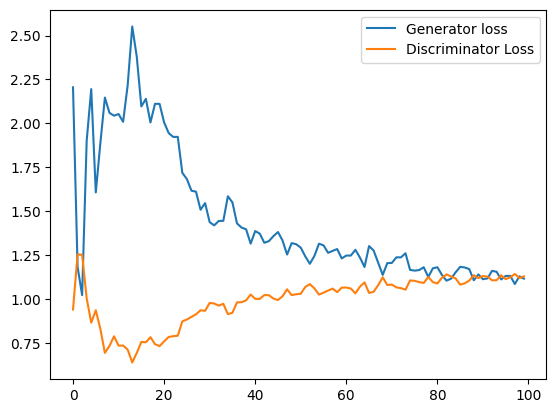

In [31]:
# plot and save the generator and discriminator loss
plt.figure()
plt.plot(losses_g, label='Generator loss')
plt.plot(losses_d, label='Discriminator Loss')
plt.legend()
plt.savefig('outputs/loss.png')